In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE

from sklearn.metrics import r2_score

In [2]:
# analiz dannyh

In [3]:
# импортирую данные 

df= pd.read_csv('sample.csv')

In [4]:
# процесс изучения данных

df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    10000 non-null  object 
 1   loc2    10000 non-null  object 
 2   para1   10000 non-null  int64  
 3   dow     10000 non-null  object 
 4   para2   10000 non-null  int64  
 5   para3   10000 non-null  float64
 6   para4   10000 non-null  float64
 7   price   10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [6]:
# Данные на 10000 записей и 8 столбцов.
# Типы данных включают объекты и числа.
# Нет пропущенных значений. 

In [7]:
df.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


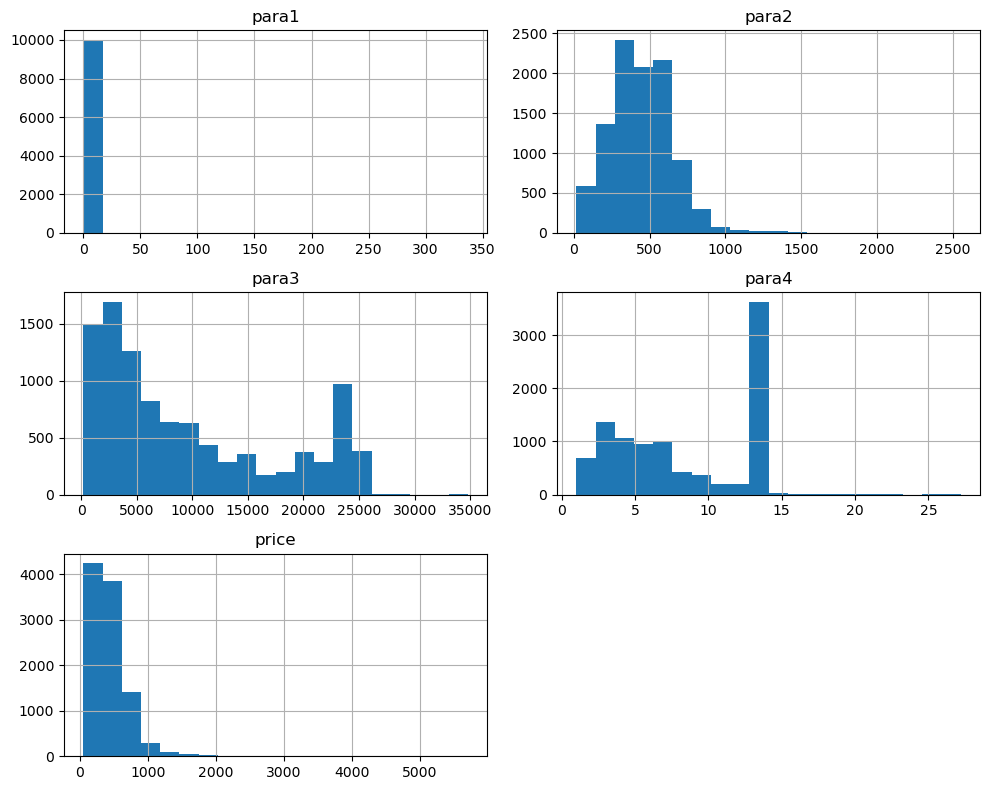

In [8]:
num = ['para1', 'para2', 'para3', 'para4', 'price']
df[num].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# распределениe числовых переменных
# пара1 данные распределены около 0-10, нужно проверить на выбросы
# пара2 проверить данные > 1300
# пара3 проверить данные >26000


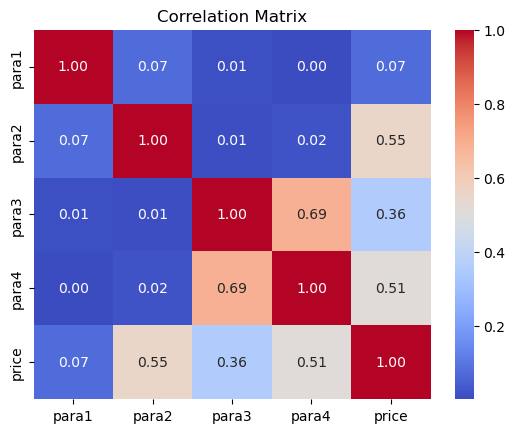

In [13]:
import seaborn as sns


corr_matrix = df[num].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Большинство пар параметров показывают очень низкие значения корреляции близкие к 0. 
# рaram2 и price также имеют небольшую положительную корреляцию в 0.55.
# Есть умеренная положительная корреляция между param4 и price (0.51).
# Для прогностических моделей param4, рaram2 могут быть ключевыми признакоми.

In [15]:
df[df['para1']>50].count()

# имеет явные выбросы 

loc1     1
loc2     1
para1    1
dow      1
para2    1
para3    1
para4    1
price    1
dtype: int64

In [16]:
df[df['para1']>5].count()

loc1     16
loc2     16
para1    16
dow      16
para2    16
para3    16
para4    16
price    16
dtype: int64

In [17]:
df = df.drop(df[df['para1'] > 5].index)

# удаляю выбросы, чтобы избежать искажения в модели 

In [18]:
df[df['para2']>1300].count()

# также в этой колонке данные до 1300 распределены нормально, после 1300 имеем выбросы 

loc1     50
loc2     50
para1    50
dow      50
para2    50
para3    50
para4    50
price    50
dtype: int64

In [19]:
df = df.drop(df[df['para2'] > 1300].index)

# дропаю выбросы в пара2

In [20]:
df[df['para3']>26000].count()

loc1     5
loc2     5
para1    5
dow      5
para2    5
para3    5
para4    5
price    5
dtype: int64

In [21]:
df = df.drop(df[df['para3'] > 26000].index)

# дропаю выбросы в пара3

In [22]:
df.describe()

,para1,para2,para3,para4,price
count,9929.000000,9929.000000,9929.00000,9929.000000,9929.000000
mean,1.326418,441.080169,9516.29582,8.443823,426.104196
std,0.923280,201.032065,8005.96630,4.613611,247.241611
min,0.000000,16.000000,200.00000,1.000000,50.730000
25%,1.000000,301.000000,2880.00000,4.000000,250.000000
50%,1.000000,433.000000,6400.00000,7.200000,370.000000
75%,1.000000,580.000000,15000.00000,13.600000,550.000000
max,5.000000,1299.000000,25787.00000,27.200000,3500.000000


In [23]:
# после анализа колонок с числовыми значениями перехожу к остальным колонкам 

In [24]:
df['dow'].unique()

# колонка dow нужно сделать encoding  

array(['Mon', 'Thu', 'Tue', 'Wed', 'Fri', 'Sat', 'Sun'], dtype=object)

In [25]:
# df['loc1'].value_counts().tail(10)

In [26]:
# df['loc2'].value_counts().tail(10)

In [27]:
df['loc1'].unique()

# в лок1 имеются непонятные строки в малом количестве, их можно удалить и поменять тип колонки в инт 

array(['0', '9', '4', '5', '7', '8', '1', '3', '2', '6', 'S'],
      dtype=object)

In [28]:
df['loc2'].unique()

array(['01', '99', '04', '40', '50', '03', '09', '74', '89', '17', '34',
       '30', '21', '59', '28', '64', '14', '46', '19', '15', '90', '67',
       '85', '24', '12', '20', '23', '08', '06', '95', '37', '77', '73',
       '88', '66', '39', '41', '68', '47', '33', '35', '78', '54', '76',
       '51', '79', '16', '02', '29', '57', '45', '80', '31', '70', '22',
       '27', '87', '53', '75', '38', '26', '25', '63', '86', '97', '81',
       '13', '49', '32', '72', '71', '10', '94', '96', '93', '42', '48',
       '55', '91', '58', '60', '44', '52', '05', '36', '82', '56', '84',
       '65', '07', '92', '83', '18', '69', '98', '62', '00', '61', '0B',
       'S6', '43', '0L', '11', '0C', '0N'], dtype=object)

In [29]:
to_drop_loc1 = ['S', 'T']

df = df[~df['loc1'].isin(to_drop_loc1)]

In [30]:
to_drop = ['TS', '0C', '0L', '0B', 'S6','0T', '0N'  ]

df = df[~df['loc2'].isin(to_drop)]

In [31]:
df['loc1'] = df['loc1'].astype(int)
df['loc2'] = df['loc2'].astype(int)

# меняю тип колонок в инт

In [32]:
df.describe()


,loc1,loc2,para1,para2,para3,para4,price
count,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000,9924.000000
mean,3.799577,42.533454,1.325776,440.784663,9517.050605,8.443613,425.830165
std,2.891786,29.348246,0.923004,200.558990,8005.582481,4.613684,246.836283
min,0.000000,0.000000,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,17.000000,1.000000,301.000000,2880.000000,4.000000,250.000000
50%,3.000000,37.000000,1.000000,433.000000,6400.000000,7.200000,370.000000
75%,7.000000,70.000000,1.000000,580.000000,15000.000000,13.600000,550.000000
max,9.000000,99.000000,5.000000,1299.000000,25787.000000,27.200000,3500.000000


In [33]:
df.info()

# все колонки кроме dow имеют числовые значение, датафрейм без нулевых значений 

<class 'pandas.core.frame.DataFrame'>
Index: 9924 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    9924 non-null   int32  
 1   loc2    9924 non-null   int32  
 2   para1   9924 non-null   int64  
 3   dow     9924 non-null   object 
 4   para2   9924 non-null   int64  
 5   para3   9924 non-null   float64
 6   para4   9924 non-null   float64
 7   price   9924 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(1)
memory usage: 620.2+ KB


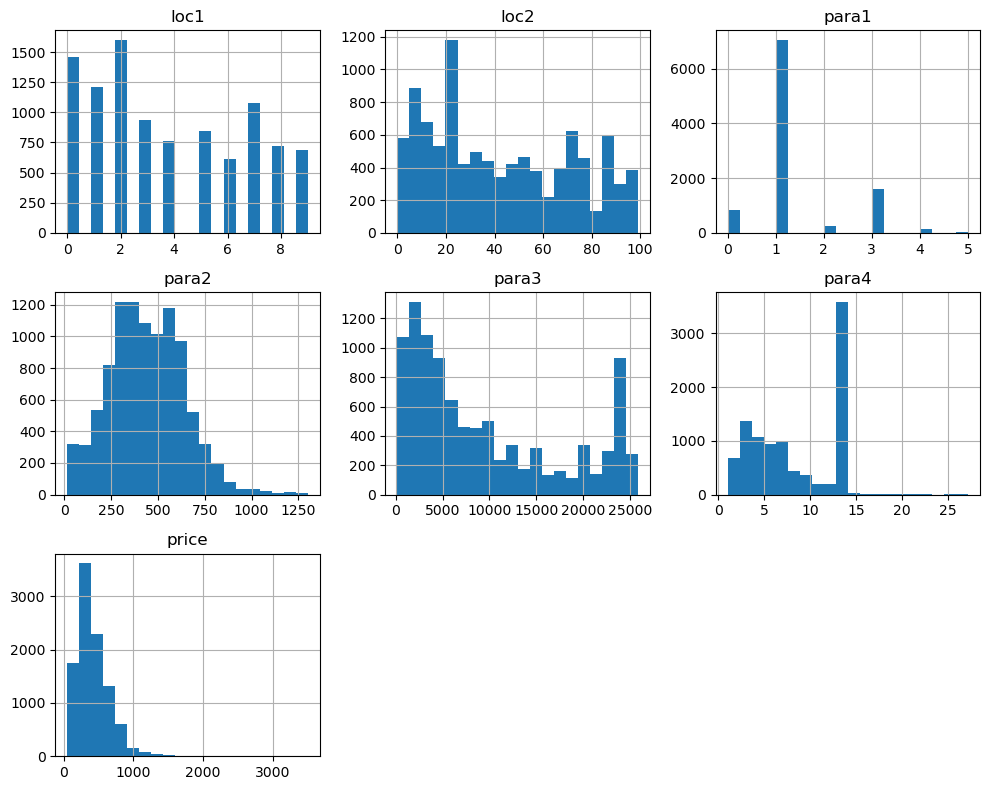

In [34]:
num1 = ['loc1', 'loc2', 'para1', 'para2', 'para3', 'para4', 'price']
df[num1].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# распределениe числовых переменных после обработки данных 

In [35]:
# models

# после обработки данных преступаем к построению регрессионных моделей 

In [ ]:
# Gradient Boosting regressor

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
features = df.drop(columns=['price']) 
target = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=79)

# делю данные на тренировочные и тестовые датасеты 

In [38]:
all_categories = pd.Series(pd.concat([X_train['dow'], X_test['dow']]).unique())

# использую переиндексацию с объединением категорий, чтобы обеспечить представление всех категорий, даже если они отсутствуют в наборе данных
X_train_dow_encoded = pd.get_dummies(X_train['dow']).reindex(columns=all_categories, fill_value=0).apply(lambda x: x.astype(int), axis=1)
X_test_dow_encoded = pd.get_dummies(X_test['dow']).reindex(columns=all_categories, fill_value=0).apply(lambda x: x.astype(int), axis=1)

# объединяю dow в байнари кодировании с остальными фитчами
X_train_encoded = pd.concat([X_train.drop('dow', axis=1), X_train_dow_encoded], axis=1)
X_test_encoded = pd.concat([X_test.drop('dow', axis=1), X_test_dow_encoded], axis=1)

In [39]:
X_train_encoded

# проверяю набор данных

,loc1,loc2,para1,para2,para3,para4,Thu,Mon,Tue,Wed,Fri,Sat,Sun
5615,2,27,1,352,23860.0,7.2,1,0,0,0,0,0,0
8900,8,89,1,417,5000.0,3.5,0,1,0,0,0,0,0
5865,2,22,1,635,12360.0,13.6,0,0,1,0,0,0,0
3368,3,30,1,315,1500.0,4.0,0,0,0,1,0,0,0
9818,3,30,1,292,9000.0,4.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1,13,1,610,2388.0,8.8,0,0,0,1,0,0,0
4967,1,14,1,532,24000.0,13.6,1,0,0,0,0,0,0
1103,3,33,1,462,6000.0,6.8,1,0,0,0,0,0,0
5345,2,21,1,663,580.0,2.6,0,1,0,0,0,0,0


In [40]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2978 entries, 3246 to 2776
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    2978 non-null   int32  
 1   loc2    2978 non-null   int32  
 2   para1   2978 non-null   int64  
 3   para2   2978 non-null   int64  
 4   para3   2978 non-null   float64
 5   para4   2978 non-null   float64
 6   Thu     2978 non-null   int32  
 7   Mon     2978 non-null   int32  
 8   Tue     2978 non-null   int32  
 9   Wed     2978 non-null   int32  
 10  Fri     2978 non-null   int32  
 11  Sat     2978 non-null   int32  
 12  Sun     2978 non-null   int32  
dtypes: float64(2), int32(9), int64(2)
memory usage: 221.0 KB


In [41]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6946 entries, 5615 to 2407
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loc1    6946 non-null   int32  
 1   loc2    6946 non-null   int32  
 2   para1   6946 non-null   int64  
 3   para2   6946 non-null   int64  
 4   para3   6946 non-null   float64
 5   para4   6946 non-null   float64
 6   Thu     6946 non-null   int32  
 7   Mon     6946 non-null   int32  
 8   Tue     6946 non-null   int32  
 9   Wed     6946 non-null   int32  
 10  Fri     6946 non-null   int32  
 11  Sat     6946 non-null   int32  
 12  Sun     6946 non-null   int32  
dtypes: float64(2), int32(9), int64(2)
memory usage: 515.5 KB


In [42]:
# датафрейм засплитился правильно, также обращаю внимание на на индексикацию колонок и их очередность 
# (если очередность в выборках разная, то модель выдаст ошибку)

In [43]:
gb_regr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=7, random_state=105)

In [44]:
gb_regr.fit(X_train_encoded, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, n_estimators=50,
                          random_state=105)

In [45]:
predict = gb_regr.predict(X_test_encoded)

In [46]:
MSE(y_test, predict) ** 0.5

204.90225670619253

In [47]:
r2_score(y_test, predict) 

0.378863013755642

In [48]:
# результаты рмсе и р2 показывают, что модель слабая
# далее использую гридсерч, чтобы улучшить модель

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [50]:
grid_search = GridSearchCV(estimator=gb_regr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

In [51]:
%%time
grid_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 6min 10s
Wall time: 6min 19s


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7, n_estimators=50,
                                                 random_state=105),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [53]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=7, random_state=105)

In [54]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

In [55]:
MSE(y_test, y_pred)** 0.5

159.15311687628196

In [56]:
r2_score(y_test, y_pred) 

0.6252650463817402

In [123]:
# после grid_search с бест парамс видим явную разницу в метриках модели
# далее фиксирую результаты модели для сравнения 

rmse_gradient = MSE(y_test, y_pred)** 0.5
r2_gradient = r2_score(y_test, y_pred) 

In [ ]:
# xgboost model

In [57]:
from xgboost import XGBRegressor

In [58]:
xgboost_m = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

In [59]:
xgboost_m.fit(X_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
predict_xgb = xgboost_m.predict(X_test_encoded)

In [61]:
MSE(y_test, predict_xgb)** 0.5

157.60184118409794

In [62]:
r2_score(y_test, predict_xgb)

0.6325345760985122

In [ ]:
# xgboost дает относительно хороший результат без гридсерч
# для результативности сделаю гридсерч 

In [124]:
%%time

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'colsample_bytree': [0.7, 0.8, 1.0]
}


xgb = XGBRegressor(random_state=42)


grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error')


grid_search_xgb.fit(X_train_encoded, y_train)


CPU times: total: 12min
Wall time: 3min 24s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [131]:
# best estimator
best_xgb = grid_search_xgb.best_estimator_

# predictions
predictions_xgb2 = best_xgb.predict(X_test_encoded)

In [132]:
grid_search_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [128]:
rmse_xgb = MSE(y_test, predictions_xgb2) ** 0.5
r2_xgb = r2_score(y_test, predictions_xgb2)

In [129]:
rmse_xgb

157.60184118409794

In [130]:
r2_xgb

0.6325345760985122

In [ ]:
# бест парамс не повлияли на результаты модели 

In [ ]:
# Random Forest 

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, max_features='sqrt')

In [65]:
forest_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt')

In [66]:
predict_forest = forest_regressor.predict(X_test_encoded)

In [67]:
MSE(y_test, predict_forest)** 0.5

182.56228887697276

In [68]:
r2_score(y_test, predict_forest)

0.506921516544256

In [69]:
param_grid_forest = {
    'n_estimators': [100, 200],
    'max_depth': [7, 8, 9, 10],
    'max_features': ['sqrt']
}

In [70]:
forest_search = GridSearchCV(estimator=forest_regressor, param_grid=param_grid_forest, scoring='neg_mean_squared_error', cv=5)

In [71]:
%%time
forest_search.fit(X_train_encoded, y_train)

CPU times: total: 1min 5s
Wall time: 1min 6s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, max_features='sqrt'),
             param_grid={'max_depth': [7, 8, 9, 10], 'max_features': ['sqrt'],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [72]:
forest_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

In [73]:
forest_regressor1 = RandomForestRegressor(n_estimators=200, max_depth=10, max_features='sqrt')

In [74]:
forest_regressor1.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=200)

In [75]:
predict_forest1 = forest_regressor1.predict(X_test_encoded)

In [76]:
MSE(y_test, predict_forest1)** (0.5)

163.1617151199356

In [77]:
r2_score(y_test, predict_forest1)

0.6061503796587004

In [133]:
rmse_randomf = MSE(y_test, predict_forest1)** (0.5)
r2_randomf = r2_score(y_test, predict_forest1)

In [ ]:
# рандом форест дает хороший результат, но xgboost модель работает лучше

In [ ]:
# Support Vector Regression (SVR) 

In [78]:
from sklearn.svm import SVR

In [79]:
scaler = MinMaxScaler()
x_tr_scaled_data = scaler.fit_transform(X_train_encoded)
x_tr_scaled = pd.DataFrame(x_tr_scaled_data, columns=X_train_encoded.columns)

x_t_scaled_data = scaler.transform(X_test_encoded)
x_t_scaled = pd.DataFrame(x_t_scaled_data, columns=X_test_encoded.columns)

# # SVR, как и многие другие методы на основе ядра, чувствителен к масштабу входных объектов, 
# поскольку пытается максимизировать разницу между классами. 
# фичи с более широкими диапазонами могут доминировать на границе решения, 
# и масштабирование помогает избежать этого, гарантируя, 
# что каждый признак вносит примерно пропорциональный вклад в окончательную модель.

In [80]:
svm_model = SVR(kernel='poly', degree=3, C=1)

In [81]:
svm_model.fit(x_tr_scaled, y_train)

SVR(C=1, kernel='poly')

In [82]:
prediction_svm = svm_model.predict(x_t_scaled)
MSE(y_test, prediction_svm) ** (0.5)

195.65105090060558

In [83]:
r2_score(y_test, prediction_svm)

0.43368472303797034

In [ ]:
# SVR модель дает низкий результат, нужно найти бест парамс 

In [84]:
%%time

params_svm = {'degree': range(3, 9), "C": [0.1, 0.01, 1, 10]}
svm_model2 = SVR(kernel='poly')
svm_search = GridSearchCV(estimator=svm_model2, param_grid=params_svm, scoring='neg_mean_squared_error', cv=3)
svm_search.fit(x_tr_scaled, y_train)

CPU times: total: 3min 5s
Wall time: 3min 9s


GridSearchCV(cv=3, estimator=SVR(kernel='poly'),
             param_grid={'C': [0.1, 0.01, 1, 10], 'degree': range(3, 9)},
             scoring='neg_mean_squared_error')

In [85]:
svm_search.best_params_

{'C': 10, 'degree': 6}

In [86]:
svm_model1 = SVR(kernel='poly', degree=6, C=10)

In [87]:
svm_model1.fit(x_tr_scaled, y_train)

SVR(C=10, degree=6, kernel='poly')

In [88]:
prediction_svm1 = svm_model1.predict(x_t_scaled)
MSE(y_test, prediction_svm1) ** (0.5)

168.61006753214565

In [89]:
r2_score(y_test, prediction_svm1)

0.5794080926993939

In [ ]:
#  с бестпарамс можем заметить большую разницу между результатами в лучшую сторону 

In [135]:
rmse_svr = MSE(y_test, prediction_svm1) ** (0.5)
r2_svr = r2_score(y_test, prediction_svm1)

In [ ]:
# Линейная регрессия с регуляризацией 

In [90]:
from sklearn.linear_model import Lasso, Ridge

In [91]:
# Создание моделей Ridge и Lasso регрессии
ridge_reg = Ridge(alpha=0.1) 
lasso_reg = Lasso(alpha=0.1)

In [92]:
lasso_reg.fit(x_tr_scaled, y_train)

Lasso(alpha=0.1)

In [93]:
ridge_reg.fit(x_tr_scaled, y_train)

Ridge(alpha=0.1)

In [94]:
y_pred_ridge = ridge_reg.predict(x_t_scaled)
y_pred_lasso = lasso_reg.predict(x_t_scaled)

In [95]:
MSE(y_test, y_pred_ridge) ** 0.5

180.47692242517826

In [96]:
r2_score(y_test, y_pred_ridge)

0.5181218209187329

In [97]:
MSE(y_test, y_pred_lasso) ** 0.5

180.56092380308857

In [98]:
r2_score(y_test, y_pred_lasso)

0.517673144704107

In [ ]:
# средний результат в сравнении предыдущими моделями 
# попробую улучшить результат с гридсерч  

In [100]:
param_grid_ridge = {'alpha': [0.1, 1, 10]}
param_grid_lasso = {'alpha': [0.1, 1, 10]}

grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso = GridSearchCV(lasso_reg, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')


In [101]:
%%time
grid_search_ridge.fit(x_tr_scaled, y_train)

CPU times: total: 328 ms
Wall time: 180 ms


GridSearchCV(cv=5, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [102]:
%%time
grid_search_lasso.fit(x_tr_scaled, y_train)

CPU times: total: 438 ms
Wall time: 238 ms


GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [105]:
grid_search_ridge.best_params_

{'alpha': 1}

In [109]:
grid_search_lasso.best_params_

# lasso модель заново тренить не буду, так как изначально оказалось что {'alpha': 0.1} бест парамс 

{'alpha': 0.1}

In [110]:
ridge_model = Ridge(alpha=1) 

In [111]:
ridge_model.fit(x_tr_scaled, y_train)

Ridge(alpha=1)

In [112]:
y_pred_ridge_model = ridge_model.predict(x_t_scaled)

In [113]:
MSE(y_test, y_pred_ridge_model) ** 0.5

180.51254224175202

In [114]:
r2_score(y_test, y_pred_ridge_model)

0.5179315904344617

In [138]:
rmse_ridge = MSE(y_test, y_pred_ridge_model) ** 0.5
r2_ridge = r2_score(y_test, y_pred_ridge_model)

In [139]:
rmse_lasso = MSE(y_test, y_pred_lasso) ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

In [ ]:
# так как пока из всех моделей наилучший результат показал xgboost, 
# хочу попробовать затренить эту модель с масштабированными данными 
# и посмотреть насколько можно улучшить результат 

In [115]:
xgboost_scaler = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=402)

In [117]:
xgboost_scaler.fit(x_tr_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=402, ...)

In [118]:
predict_xgb_scaled = xgboost_scaler.predict(x_t_scaled)

In [119]:
MSE(y_test, predict_xgb_scaled)** 0.5

157.60184118409794

In [120]:
r2_score(y_test, predict_xgb_scaled)

0.6325345760985122

In [ ]:
# с масштабированными данными xgboost выдает такие же результаты 

In [ ]:
# после обучения нескольких регрессионных моделей, хочу сравнить результаты 

In [136]:
model_names = ['Gradient Boosting', 'XGBoost', 'RandomForest', 'SVR', 'LR Lasso', 'LR Ridge']

In [140]:
rmse_values = [rmse_gradient, rmse_xgb, rmse_randomf, rmse_svr, rmse_lasso, rmse_ridge]

# Создание словаря с названиями моделей в качестве ключей и их RMSE в качестве значений
model_rmse_dict = dict(zip(model_names, rmse_values))

# Вывод словаря для проверки
print(model_rmse_dict)

{'Gradient Boosting': 159.15311687628196, 'XGBoost': 157.60184118409794, 'RandomForest': 163.1617151199356, 'SVR': 168.61006753214565, 'LR Lasso': 180.56092380308857, 'LR Ridge': 180.51254224175202}


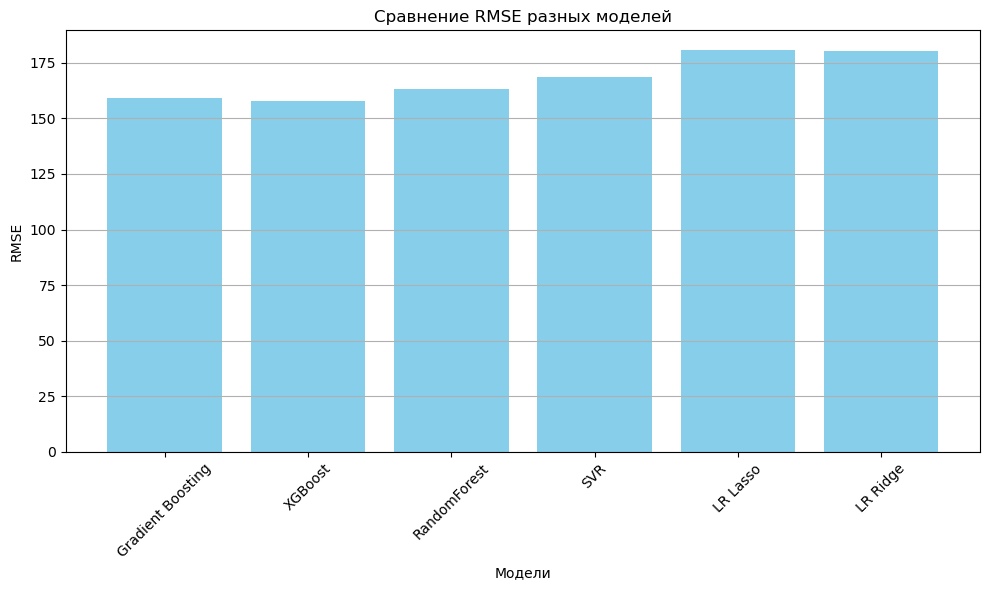

In [141]:
plt.figure(figsize=(10, 6))
plt.bar(model_rmse_dict.keys(), model_rmse_dict.values(), color='skyblue')
plt.xlabel('Модели')
plt.ylabel('RMSE')
plt.title('Сравнение RMSE разных моделей')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()


In [143]:
r2_values = [r2_gradient, r2_xgb, r2_randomf, r2_svr, r2_lasso, r2_ridge]

# Создание словаря с названиями моделей в качестве ключей и их RMSE в качестве значений
model_r2_dict = dict(zip(model_names, r2_values))

# Вывод словаря для проверки
print(model_r2_dict)

{'Gradient Boosting': 0.6252650463817402, 'XGBoost': 0.6325345760985122, 'RandomForest': 0.6061503796587004, 'SVR': 0.5794080926993939, 'LR Lasso': 0.517673144704107, 'LR Ridge': 0.5179315904344617}


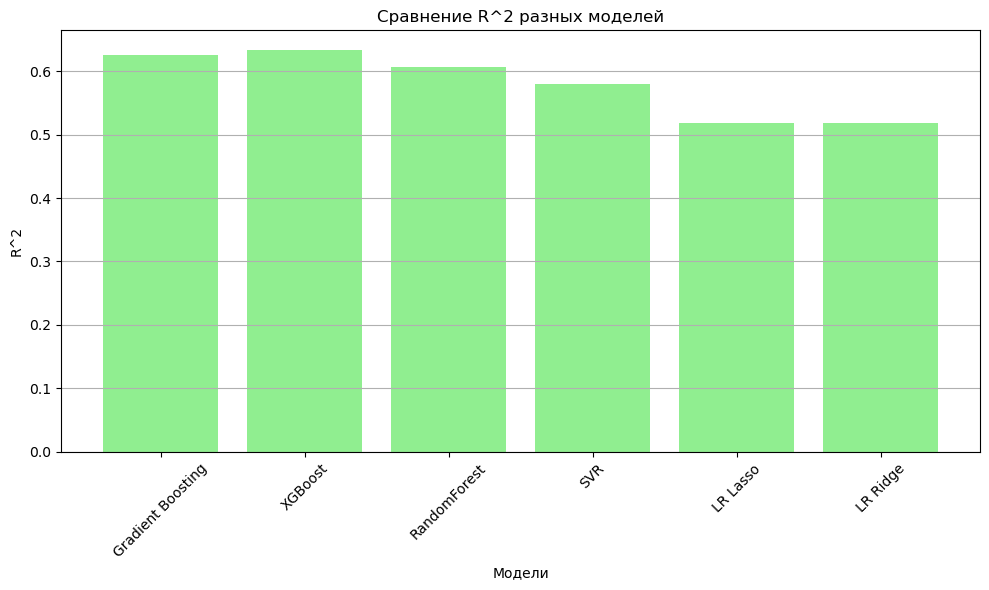

In [144]:
plt.figure(figsize=(10, 6))
plt.bar(model_r2_dict.keys(), model_r2_dict.values(), color='lightgreen')
plt.xlabel('Модели')
plt.ylabel('R^2')
plt.title('Сравнение R^2 разных моделей')
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.grid(axis='y')  # Включение сетки только по оси Y
plt.tight_layout()  # Автоматическая настройка макета
plt.show()

In [145]:
# Нахождение наилучшей модели (минимального RMSE) и вывод информации о ней
best_model_name = min(model_rmse_dict, key=model_rmse_dict.get)
best_rmse = model_rmse_dict[best_model_name]

print(f"Лучший результат у {best_model_name} с RMSE = {best_rmse}")

Лучший результат у XGBoost с RMSE = 157.60184118409794


In [146]:
best_model_name_r2 = max(model_r2_dict, key=model_r2_dict.get)
best_r2 = model_r2_dict[best_model_name_r2]

print(f"Лучший результат по R^2 у {best_model_name_r2} с R^2 = {best_r2}")

Лучший результат по R^2 у XGBoost с R^2 = 0.6325345760985122
